In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

%matplotlib inline

In [4]:
# Read and take a look at our data
df = pd.read_csv('datasets/train_clean.csv')
test = pd.read_csv('datasets/test_clean.csv')
df.head(3)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL           NaN     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   

  lot_shape land_contour utilities    ...     open_porch_sf enclosed_porch  \
0       IR1          Lvl    AllPub    ...                44              0   
1       IR1          Lvl    AllPub    ...                74              0   
2       Reg          Lvl    AllPub    ...                52              0   

  3ssn_porch screen_porch pool_area misc_val mo_sold  yr_sold  sale_type  \
0          0            0         0        0       3     2010        WD    
1          0            0         0        0       4     2009        WD    
2          0            0         0        0       1     2010        WD    

   saleprice  
0     130500  
1     220000  
2     109000  

[3 rows x 76 columns]

## Explore and create dummy variables for our data

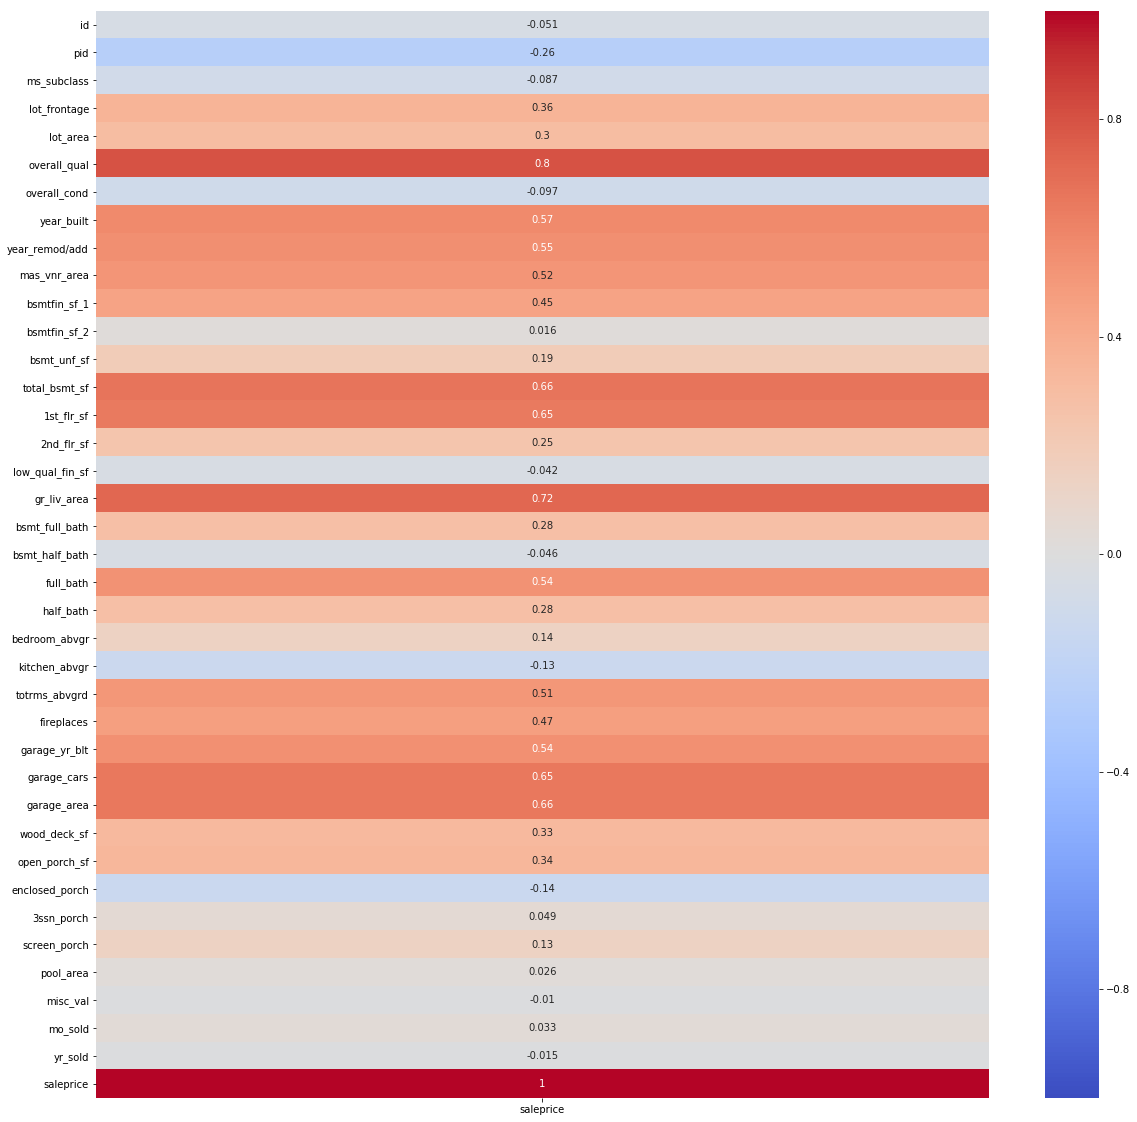

In [7]:
# Check for correlation of our data via visual and numerical representations
plt.figure(figsize=(20,20))
sns.heatmap(df.corr()[['saleprice']],
           annot = True,
           vmax = 1,
           vmin = -1,
           cmap = 'coolwarm')

In [8]:
df.corr()[['saleprice']].sort_values(by = 'saleprice',axis = 0, ascending = False).head(15)

saleprice
saleprice        1.000000
overall_qual     0.803462
gr_liv_area      0.719463
total_bsmt_sf    0.664819
garage_area      0.655483
garage_cars      0.648667
1st_flr_sf       0.648252
year_built       0.572405
year_remod/add   0.550872
garage_yr_blt    0.541553
full_bath        0.538225
mas_vnr_area     0.520023
totrms_abvgrd    0.509775
fireplaces       0.473783
bsmtfin_sf_1     0.445764

In [9]:
df.corr()[['saleprice']].sort_values(by = 'saleprice',axis = 0, ascending = True).head(5)

saleprice
pid             -0.255068
enclosed_porch  -0.135713
kitchen_abvgr   -0.125472
overall_cond    -0.097093
ms_subclass     -0.087331

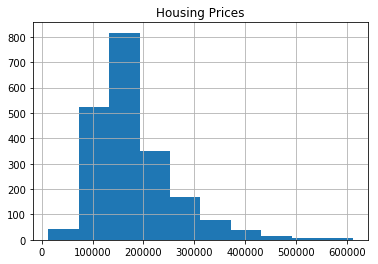

In [11]:
# Check the the target variable for normal ditribution and save the 
df['saleprice'].hist()
plt.title('Housing Prices');
plt.savefig("Images/housing_prices")

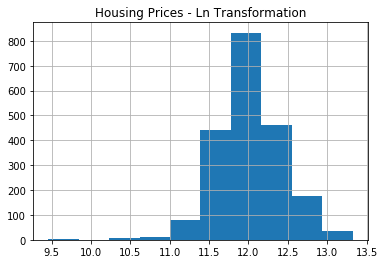

In [13]:
# CThe ln transformation of the target give us a better normal distribution and helps account for outliers
np.log(df['saleprice']).hist()
plt.title('Housing Prices - Ln Transformation');
plt.savefig("Images/housing_prices_log")

In [14]:
# Creating a function to plot the distribution for all of our numeric variables
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))     # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12, nrows * 8))    # You'll want to specify your figsize
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):    # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])               
        ax[i].set_title(list_of_titles[i])          # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].vlines(dataframe[column].mean(), ymin = 0, ymax = 20, color = 'r')

In [15]:
# Creating a list of numeric variables
df_num = df[list(df.describe().columns)]
test_num = df[list(test.describe().columns)]

df_num = df_num.drop(labels= ['pid','ms_subclass'], axis=1)
test_num = test_num.drop(labels= ['pid','ms_subclass'], axis=1)

/Users/dmitriy/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/dmitriy/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


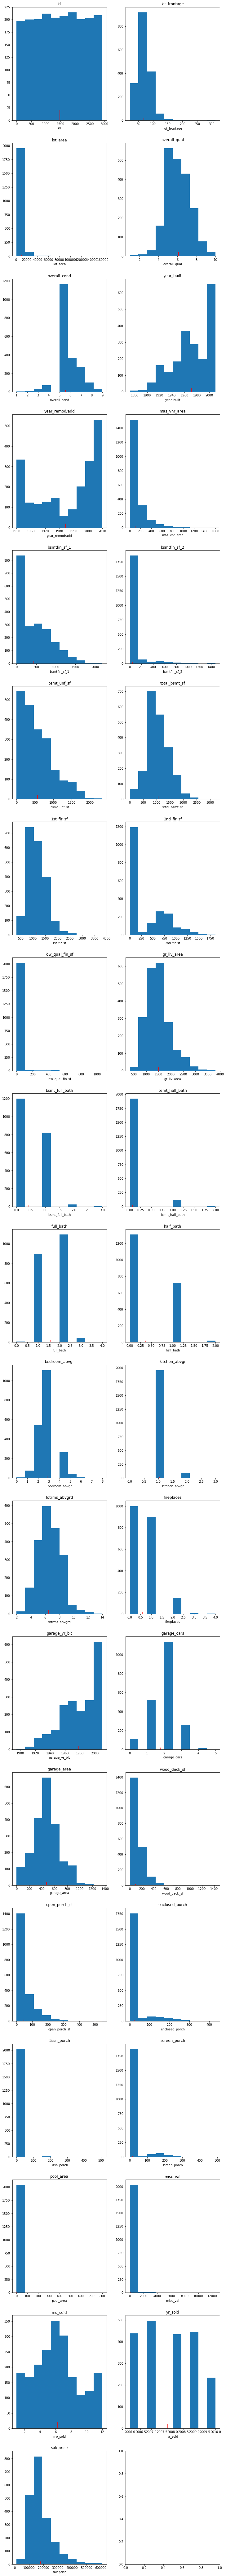

In [16]:
subplot_histograms(df_num, list(df_num.columns), list(df_num.columns), list(df_num.columns))

In [17]:
# Creating a function to create a scatterplot vs our target variable
def subplot_scatter(dataframe, variable, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))     # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (16, nrows * 6))    # You'll want to specify your figsize
    ax = ax.ravel()                                 # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns):    # Gives us an index value to get into all our lists
        ax[i].scatter(dataframe[column],variable, alpha = .3)               
        ax[i].set_title(list_of_titles[i])          # Set titles, labels, etc here for each subplot
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].vlines(dataframe[column].mean(), ymin = 0, ymax = 20, color = 'r')

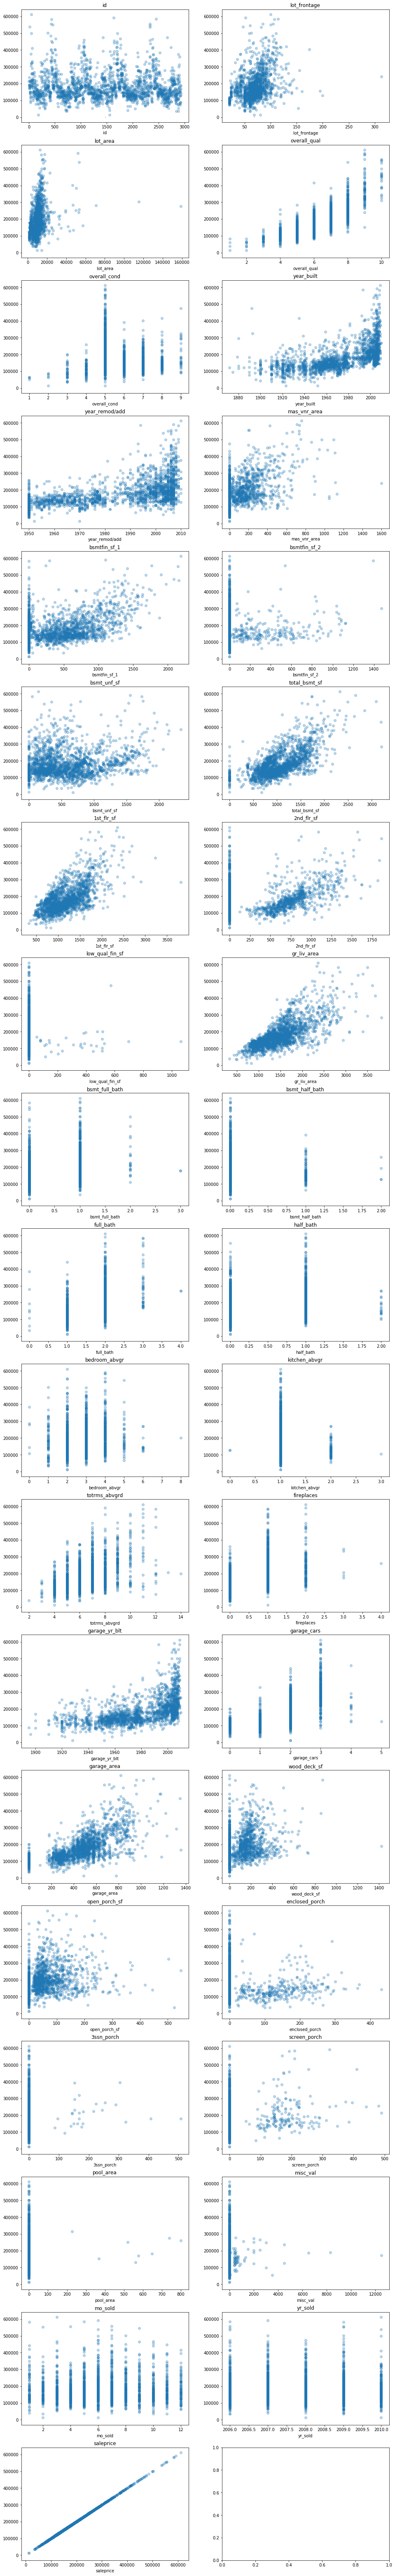

In [18]:
subplot_scatter(df_num, df_num['saleprice'],list(df_num.columns), list(df_num.columns), list(df_num.columns))

Notable histograms that could use further investigation: 

Make an additional variable:
    - Lot Area - extreme outliers, anything over 30000 should be large lot
    - Year Built - has a normal distribution but also a very significant number of houses built recently, new variable if house is built after ~2003 or newer
    - Mas Vnr Area - has a long tail
    - 1st Flr SF - anything over 1800 should large
    - 2nd Flr SF - Try adding a binary and then square footage
    - Gr Liv Area - larger Area 2850
    - Garage Area - null or not feature

Transformation of the follwoing variables:
    - year_built / garage_yr_blt - converted to years old and take square root
    - lot_area - log
    - mas_vnr_area - log
    - bsmtfin_sf_1 / bsmtfin_sf_2 - log
    - bsmt_unf_sf - log
    - 1st_flr_sf - log
    - 2nd_flr_sf - log
    - gr_liv_area - log
    - wood_deck_sf - log

#### Create new features to help seperate the data

In [19]:
df['built_2003_or_newer'] = np.where(df['year_built']> 2003,1,0)
df['large_first_floor'] = np.where(df['1st_flr_sf']> 1800,1,0)
df['large_living_area'] = np.where(df['gr_liv_area']> 2850,1,0)
df['has_garage'] = np.where(df['garage_area']> 0,1,0)
df['large_lot_area'] = np.where(df['lot_area']> 28000,1,0)
df['has_remodeled'] = np.where(df['year_remod/add']> 0,1,0)
df['has_second_floor'] = np.where(df['2nd_flr_sf']> 0,1,0)
df['has_fireplace'] = np.where(df['fireplaces']> 0,1,0)

In [20]:
test['built_2003_or_newer'] = np.where(test['year_built']> 2003,1,0)
test['large_first_floor'] = np.where(test['1st_flr_sf']> 1800,1,0)
test['large_living_area'] = np.where(test['gr_liv_area']> 2850,1,0)
test['has_garage'] = np.where(test['garage_area']> 0,1,0)
test['large_lot_area'] = np.where(test['lot_area']> 28000,1,0)
test['has_remodeled'] = np.where(test['year_remod/add']> 0,1,0)
test['has_second_floor'] = np.where(test['2nd_flr_sf']> 0,1,0)
test['has_fireplace'] = np.where(test['fireplaces']> 0,1,0)

#### Bring in additional variables for right skewed data

In [29]:
df['years_since_built_sqrt'] = [np.sqrt(2011 - each) for each in df['year_built'] ]
df['years_since_bgarage_yr_blt_sqrt'] = [np.sqrt(2011 - each) for each in df['garage_yr_blt'] ]

test['years_since_built_sqrt'] = [np.sqrt(2011 - each) for each in test['year_built'] ]
test['years_since_bgarage_yr_blt_sqrt'] = [np.sqrt(2011 - each) for each in test['garage_yr_blt'] ]

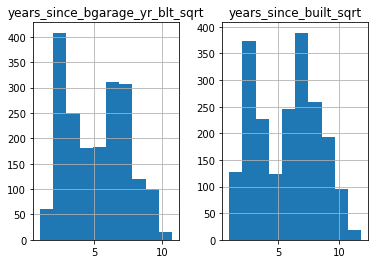

In [30]:
df[['years_since_built_sqrt','years_since_bgarage_yr_blt_sqrt']].hist();

In [31]:
# Bring in additional feature to help seperate the data

df['years_since_built_sqrt_new'] = np.where(df['years_since_built_sqrt']< 5,1,0)
df['years_since_bgarage_yr_blt_sqrt_new'] = np.where(df['years_since_bgarage_yr_blt_sqrt']<5,1,0)

test['years_since_built_sqrt_new'] = np.where(test['years_since_built_sqrt']< 5,1,0)
test['years_since_bgarage_yr_blt_sqrt_new'] = np.where(test['years_since_bgarage_yr_blt_sqrt']<5,1,0)

#### Create log transformation of the data

In [33]:
df['lot_area'+'_log'] = np.where(df['lot_area']!=0,np.log(df['lot_area']),0)
df['mas_vnr_area'+'_log'] = np.where(df['mas_vnr_area']!=0,np.log(df['mas_vnr_area']),0)
df['bsmtfin_sf_1'+'_log'] = np.where(df['bsmtfin_sf_1']!=0,np.log(df['bsmtfin_sf_1']),0)
df['bsmtfin_sf_2'+'_log'] = np.where(df['bsmtfin_sf_2']!=0,np.log(df['bsmtfin_sf_2']),0)
df['bsmt_unf_sf'+'_log'] = np.where(df['bsmt_unf_sf']!=0,np.log(df['bsmt_unf_sf']),0)
df['1st_flr_sf'+'_log'] = np.where(df['1st_flr_sf']!=0,np.log(df['1st_flr_sf']),0)
df['2nd_flr_sf'+'_log'] = np.where(df['2nd_flr_sf']!=0,np.log(df['2nd_flr_sf']),0)
df['gr_liv_area'+'_log'] = np.where(df['gr_liv_area']!=0,np.log(df['gr_liv_area']),0)
df['wood_deck_sf'+'_log'] = np.where(df['wood_deck_sf']!=0,np.log(df['wood_deck_sf']),0)

In [34]:
test['lot_area'+'_log'] = np.where(test['lot_area']!=0,np.log(test['lot_area']),0)
test['mas_vnr_area'+'_log'] = np.where(test['mas_vnr_area']!=0,np.log(test['mas_vnr_area']),0)
test['bsmtfin_sf_1'+'_log'] = np.where(test['bsmtfin_sf_1']!=0,np.log(test['bsmtfin_sf_1']),0)
test['bsmtfin_sf_2'+'_log'] = np.where(test['bsmtfin_sf_2']!=0,np.log(test['bsmtfin_sf_2']),0)
test['bsmt_unf_sf'+'_log'] = np.where(test['bsmt_unf_sf']!=0,np.log(test['bsmt_unf_sf']),0)
test['1st_flr_sf'+'_log'] = np.where(test['1st_flr_sf']!=0,np.log(test['1st_flr_sf']),0)
test['2nd_flr_sf'+'_log'] = np.where(test['2nd_flr_sf']!=0,np.log(test['2nd_flr_sf']),0)
test['gr_liv_area'+'_log'] = np.where(test['gr_liv_area']!=0,np.log(test['gr_liv_area']),0)
test['wood_deck_sf'+'_log'] = np.where(test['wood_deck_sf']!=0,np.log(test['wood_deck_sf']),0)

In [35]:
# Select log tranformed data
log_columns = [i for i in df.columns if 'log' in i]

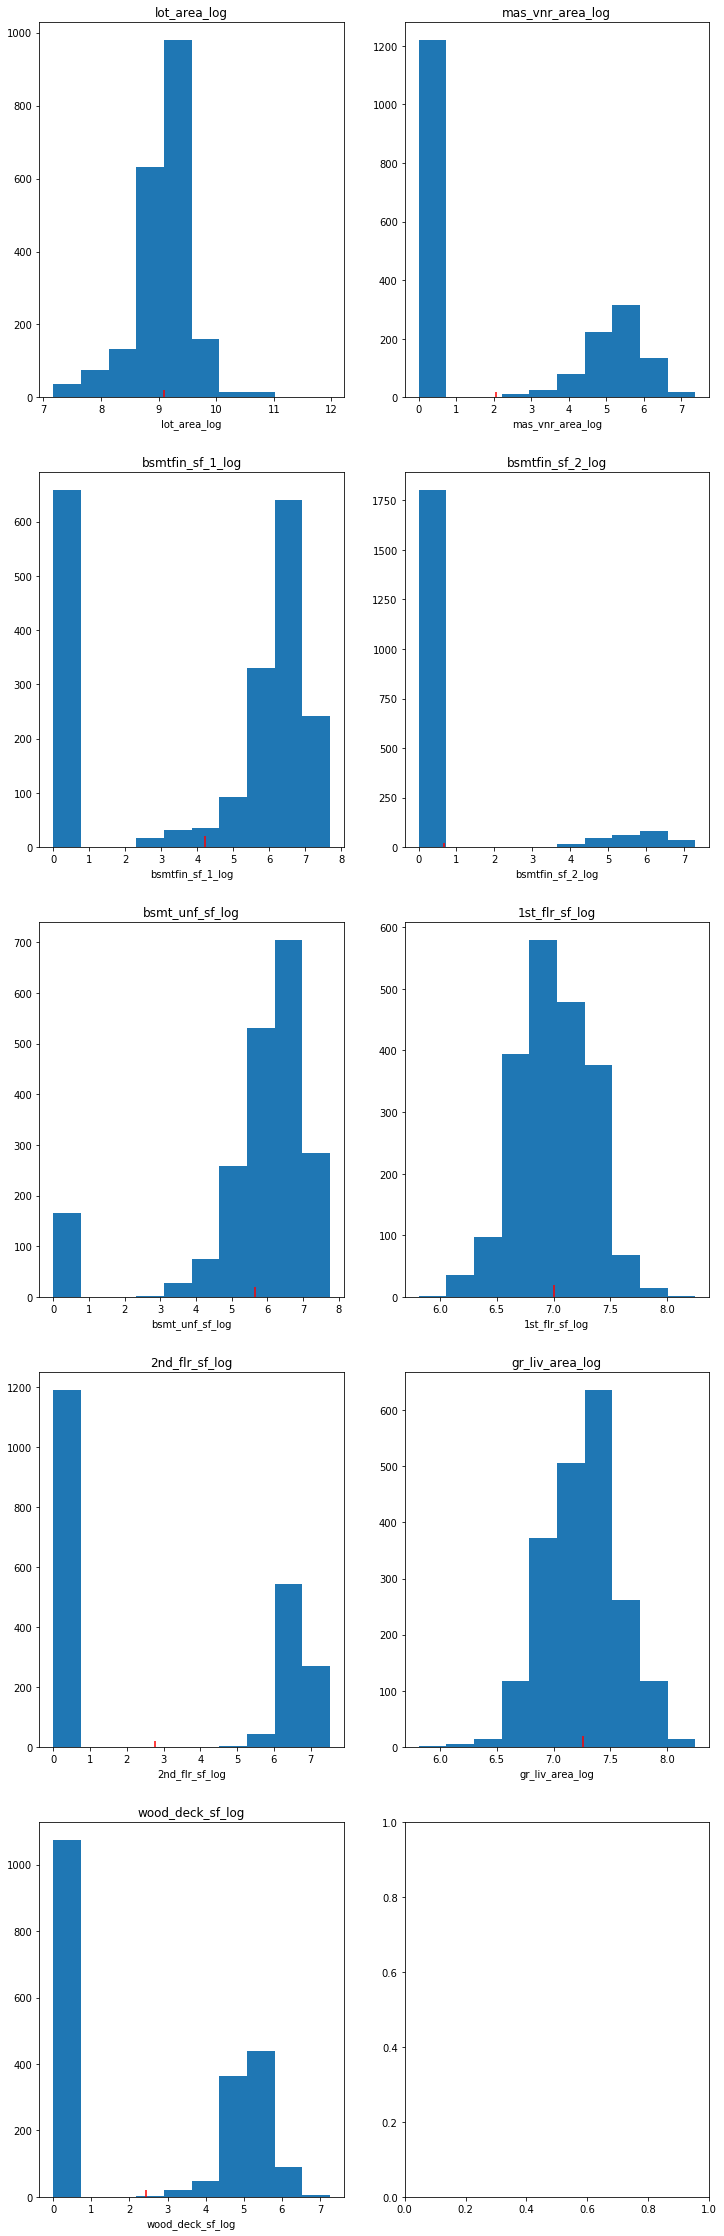

In [36]:
# Create a scatterplot of log_tranformed data
subplot_histograms(df[log_columns], log_columns, log_columns, log_columns)

    Create additional transformations on the data for zero values of log transformations

In [37]:
# Create additional transformations on the data for zero values of log transformations
df['has_mas_vnr_area'] = np.where(df['mas_vnr_area'+'_log'] >0 ,1,0)
df['has_bsmtfin_sf_1'] = np.where(df['bsmtfin_sf_1'+'_log'] >0 ,1,0)
df['has_bsmtfin_sf_2'] = np.where(df['bsmtfin_sf_2'+'_log'] >0 ,1,0)
df['has_bsmt_unf_sf'] = np.where(df['bsmt_unf_sf'+'_log'] >0 ,1,0)
df['has_2nd_flr_sf'] = np.where(df['2nd_flr_sf'+'_log'] >0 ,1,0)
df['has_wood_deck_sf'] = np.where(df['wood_deck_sf'+'_log'] >0 ,1,0)

test['has_mas_vnr_area'] = np.where(test['mas_vnr_area'+'_log'] >0 ,1,0)
test['has_bsmtfin_sf_1'] = np.where(test['bsmtfin_sf_1'+'_log'] >0 ,1,0)
test['has_bsmtfin_sf_2'] = np.where(test['bsmtfin_sf_2'+'_log'] >0 ,1,0)
test['has_bsmt_unf_sf'] = np.where(test['bsmt_unf_sf'+'_log'] >0 ,1,0)
test['has_2nd_flr_sf'] = np.where(test['2nd_flr_sf'+'_log'] >0 ,1,0)
test['has_wood_deck_sf'] = np.where(test['wood_deck_sf'+'_log'] >0 ,1,0)

In [39]:
# Checking our data
print('Trainig Data', df.shape)
print('Testing Data', test.shape)

Trainig Data (2049, 103)
Testing Data (879, 102)


### Explore categorical data

In [40]:
# Select all categorical variables
df_num = df[list(df.describe().columns)]
categorical = [i for i in list(df.columns) if i not in list(df_num.columns)]
df_cat = df[categorical]

In [41]:
# Explore the distribution of categorical variables
for i in df_cat:
    print(i,"\n", df_cat[i].value_counts(),"\n")

ms_zoning 
 RL         1596
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: ms_zoning, dtype: int64 

street 
 Pave    2042
Grvl       7
Name: street, dtype: int64 

lot_shape 
 Reg    1295
IR1     691
IR2      55
IR3       8
Name: lot_shape, dtype: int64 

land_contour 
 Lvl    1843
HLS      85
Bnk      78
Low      43
Name: land_contour, dtype: int64 

utilities 
 AllPub    2047
NoSeWa       1
NoSewr       1
Name: utilities, dtype: int64 

lot_config 
 Inside     1502
Corner      347
CulDSac     131
FR2          60
FR3           9
Name: lot_config, dtype: int64 

land_slope 
 Gtl    1951
Mod      88
Sev      10
Name: land_slope, dtype: int64 

neighborhood 
 NAmes      310
CollgCr    180
OldTown    163
Edwards    141
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr 

#### I will throw the kitcken sink at the wall with all these variables and let LASSO eliminate any unnecessary variables

In [42]:
 # I will throw the kitcken sink at the wall with all these variables 
 # and let LASSO eliminate any unnecessary variables
df = pd.get_dummies(df, columns = categorical, drop_first = True)
test = pd.get_dummies(test, columns = categorical, drop_first = True)

df = pd.get_dummies(df, columns = ['ms_subclass'], drop_first = True)
test = pd.get_dummies(test, columns = ['ms_subclass'], drop_first = True)

### Alighn the Training and Test data

In [43]:
df.shape, test.shape

((2049, 275), (879, 260))

In [56]:
# Adding columns to the testing data set and setting the missing values to zero
new_col = list(test.columns)
or_col = list(df.columns)

add_col = [i for i in or_col if i not in new_col]
for i in add_col:
    test[i] = 0

In [57]:
df.shape, test.shape

((2049, 275), (879, 284))

In [58]:
df.isnull().sum().sort_values(ascending = False).head(20)

ms_subclass_190         0
neighborhood_Gilbert    0
neighborhood_BrDale     0
neighborhood_BrkSide    0
neighborhood_ClearCr    0
neighborhood_CollgCr    0
neighborhood_Crawfor    0
neighborhood_Edwards    0
neighborhood_Greens     0
ms_zoning_RH            0
neighborhood_GrnHill    0
neighborhood_IDOTRR     0
neighborhood_Landmrk    0
neighborhood_MeadowV    0
neighborhood_Mitchel    0
neighborhood_NAmes      0
neighborhood_Blueste    0
land_slope_Sev          0
land_slope_Mod          0
lot_config_Inside       0
dtype: int64

In [59]:
# All N/A values will be filled with zeros, there could more data exploration to see if this is the right thing to do
df = df.fillna(0)
test = test.fillna(0)

In [60]:
df.head(3)

id        pid  lot_frontage  lot_area  overall_qual  overall_cond  \
0  109  533352170           0.0     13517             6             8   
1  544  531379050          43.0     11492             7             5   
2  153  535304180          68.0      7922             5             7   

   year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1       ...         \
0        1976            2005         289.0         533.0       ...          
1        1996            1997         132.0         637.0       ...          
2        1953            2007           0.0         731.0       ...          

   ms_subclass_70  ms_subclass_75  ms_subclass_80  ms_subclass_85  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   

   ms_subclass_90  ms_subclass_120  ms_subclass_150  ms_subclass_160  \
0               0                0                0                0   
1               0                0                0                0   
2               0                0                0                0   

   ms_subclass_180  ms_subclass_190  
0                0                0  
1                0                0  
2                0                0  

[3 rows x 275 columns]

In [61]:
test.head(3)

id        pid  lot_frontage  lot_area  overall_qual  overall_cond  \
0  2658  902301120          69.0      9142             6             8   
1  2718  905108090           0.0      9662             5             4   
2  2414  528218130          58.0     17104             7             5   

   year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1       ...         \
0        1910            1950           0.0             0       ...          
1        1977            1977           0.0             0       ...          
2        2006            2006           0.0           554       ...          

   bsmt_cond_Fa  bsmt_cond_Po  heating_OthW  heating_Wall  heating_qc_Po  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             0             0             0             0              0   

   electrical_Mix  functional_Sal  functional_Sev  garage_qual_Fa  \
0               0               0               0               0   
1               0               0               0               0   
2               0               0               0               0   

   ms_subclass_150  
0                0  
1                0  
2                0  

[3 rows x 284 columns]

In [62]:
# Exporting data ready for modeling
df.to_csv('datasets/train_model_ready.csv', index = False)
test.to_csv('datasets/test_model_ready.csv', index = False)